<a href="https://colab.research.google.com/github/noviarst/Portofilo_Data/blob/main/Project_Winter_Club_Generation_Girls.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Membaca File csv**

In [ ]:
# Instalasi package reshape2 untuk mempermudah membuat correlation map
install.packages("reshape2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’




In [ ]:
library(dplyr)
library(ggplot2)
library(reshape2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
df <-read.csv("/content/Sample - Store - Orders.csv",  sep = ",")
head(df,5)

,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Country,City,State,Postal.Code,Region,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>
1,CA-2016-152156,8/11/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2016-152156,8/11/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",731.9400,3,0.00,219.5820
3,CA-2016-138688,12/6/2016,16/6/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters by Universal,14.6200,2,0.00,6.8714
4,US-2015-108966,11/10/2015,18/10/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,US-2015-108966,11/10/2015,18/10/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
cat("bentuk data")
cat("\njumlah baris: ", nrow(df))
cat("\njumlah kolom: ", ncol(df))

bentuk data
jumlah baris:  9994
jumlah kolom:  20

In [ ]:
summary(df)

   Order.ID          Order.Date         Ship.Date          Ship.Mode        
 Length:9994        Length:9994        Length:9994        Length:9994       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
 Customer.ID        Customer.Name        Segment            Country         
 Length:9994        Length:9994        Length:9994        Length:9994       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            

In [ ]:
#Tipe Data dari setiap atribut
print(sapply(df,class))

     Order.ID    Order.Date     Ship.Date     Ship.Mode   Customer.ID 
  "character"   "character"   "character"   "character"   "character" 
Customer.Name       Segment       Country          City         State 
  "character"   "character"   "character"   "character"   "character" 
  Postal.Code        Region    Product.ID      Category  Sub.Category 
    "integer"   "character"   "character"   "character"   "character" 
 Product.Name         Sales      Quantity      Discount        Profit 
  "character"     "numeric"     "integer"     "numeric"     "numeric" 


In [ ]:
# Konversi kolom 'Order.Date' menjadi tipe data Date
df$Order.Date <- as.Date(df$Order.Date, format = '%d/%m/%Y')

# Cek tipe data kolom 'Order.Date' setelah perubahan
str(df$Order.Date)

 Date[1:9994], format: "2016-11-08" "2016-11-08" "2016-06-12" "2015-10-11" "2015-10-11" ...


In [ ]:
# Konversi kolom 'Ship.Date' menjadi tipe data Date
df$Ship.Date <- as.Date(df$Ship.Date, format = '%d/%m/%Y')

# Cek tipe data kolom 'Ship.Date' setelah perubahan
str(df$Ship.Date)

 Date[1:9994], format: "2016-11-11" "2016-11-11" "2016-06-16" "2015-10-18" "2015-10-18" ...


In [ ]:
#Tipe Data dari setiap atribut
print(sapply(df,class))

     Order.ID    Order.Date     Ship.Date     Ship.Mode   Customer.ID 
  "character"        "Date"        "Date"   "character"   "character" 
Customer.Name       Segment       Country          City         State 
  "character"   "character"   "character"   "character"   "character" 
  Postal.Code        Region    Product.ID      Category  Sub.Category 
    "integer"   "character"   "character"   "character"   "character" 
 Product.Name         Sales      Quantity      Discount        Profit 
  "character"     "numeric"     "integer"     "numeric"     "numeric" 


In [ ]:
# memeriksa ulang jumlah baris yang berisi nilai yang hilang
sum(is.na(df))

[1] 0

In [ ]:
# Menghitung jumlah missing values (NA) dalam setiap kolom dataframe
jumlah_missing_per_kolom <- colSums(is.na(df))
print(jumlah_missing_per_kolom)

     Order.ID    Order.Date     Ship.Date     Ship.Mode   Customer.ID 
            0             0             0             0             0 
Customer.Name       Segment       Country          City         State 
            0             0             0             0             0 
  Postal.Code        Region    Product.ID      Category  Sub.Category 
            0             0             0             0             0 
 Product.Name         Sales      Quantity      Discount        Profit 
            0             0             0             0             0 


In [ ]:
# Menghitung jumlah baris yang merupakan duplikat
jumlah_duplikat <- sum(duplicated(df) | duplicated(df, fromLast = TRUE))
print(jumlah_duplikat)

[1] 2


In [ ]:
# Menghapus baris duplikat menggunakan unique()
df <- unique(df)

In [ ]:
# Menghitung jumlah baris yang merupakan duplikat
jumlah_duplikat <- sum(duplicated(df) | duplicated(df, fromLast = TRUE))
print(jumlah_duplikat)

[1] 0


In [ ]:
# Memeriksa jumlah nilai yang unique pada setiap kolom
print(rapply(df, function(x) length(unique(x))))

     Order.ID    Order.Date     Ship.Date     Ship.Mode   Customer.ID 
         5009          1237          1334             4           793 
Customer.Name       Segment       Country          City         State 
          793             3             1           531            49 
  Postal.Code        Region    Product.ID      Category  Sub.Category 
          631             4          1862             3            17 
 Product.Name         Sales      Quantity      Discount        Profit 
         1850          5825            14            12          7287 


In [ ]:
tail(df, 20)

,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Country,City,State,Postal.Code,Region,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit
,<chr>,<date>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>
9975,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,California,90032,West,OFF-AR-10004752,Office Supplies,Art,Blackstonian Pencils,18.690,7,0.0,5.2332
9976,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,California,90032,West,OFF-PA-10000743,Office Supplies,Paper,Xerox 1977,13.360,2,0.0,6.4128
9977,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,California,90032,West,TEC-PH-10002496,Technology,Phones,Cisco SPA301,249.584,2,0.2,31.1980
9978,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,California,90032,West,OFF-FA-10003467,Office Supplies,Fasteners,"Alliance Big Bands Rubber Bands, 12/Pack",13.860,7,0.0,0.0000
9979,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,California,90032,West,OFF-BI-10003727,Office Supplies,Binders,Avery Durable Slant Ring Binders With Label Holder,13.376,4,0.2,4.6816
9980,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,California,90032,West,OFF-BI-10002026,Office Supplies,Binders,Ibico Recycled Linen-Style Covers,437.472,14,0.2,153.1152
9981,US-2015-151435,2015-09-06,2015-09-09,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,Louisiana,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.980,1,0.0,22.3548
9982,CA-2017-163566,2017-08-03,2017-08-06,First Class,TB-21055,Ted Butterfield,Consumer,United States,Fairfield,Ohio,45014,East,OFF-LA-10004484,Office Supplies,Labels,Avery 476,16.520,5,0.2,5.3690
9983,US-2016-157728,2016-09-22,2016-09-28,Standard Class,RC-19960,Ryan Crowe,Consumer,United States,Grand Rapids,Michigan,49505,Central,OFF-PA-10002195,Office Supplies,Paper,"RSVP Cards & Envelopes, Blank White, 8-1/2"" X 11"", 24 Cards/25 Envelopes/Set",35.560,7,0.0,16.7132


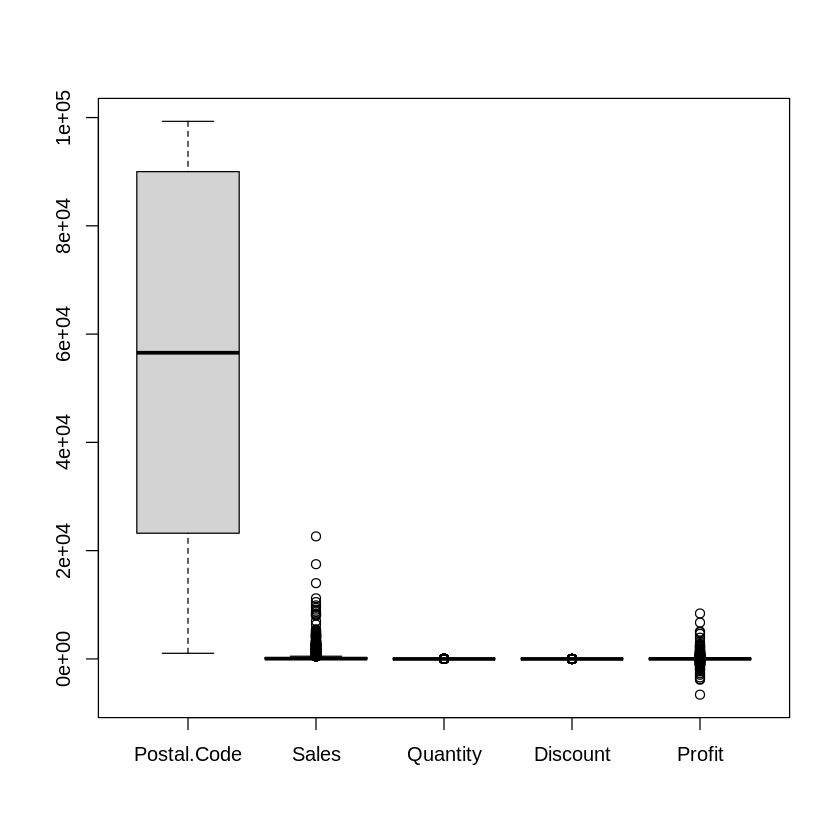

In [ ]:
#Boxplot untuk melihat outliers
num_cols <- unlist(lapply(df, is.numeric)) #Memilih kolom bertipe numerik
df_num <- df[ , num_cols]
boxplot(df_num)

In [ ]:
# Pisahkan kolom numerik
kolom_numerik <- df[, sapply(df, is.numeric)]

# Tentukan metode deteksi outlier
metode_outlier <- "IQR"

# Fungsi untuk mendeteksi outlier berdasarkan metode IQR
deteksi_outlier_IQR <- function(x) {
  Q1 <- quantile(x, 0.25)
  Q3 <- quantile(x, 0.75)
  IQR <- Q3 - Q1
  batas_bawah <- Q1 - 1.5 * IQR
  batas_atas <- Q3 + 1.5 * IQR
  return(x < batas_bawah | x > batas_atas)
}

# Deteksi outlier berdasarkan metode IQR
outliers <- if (metode_outlier == "IQR") {
  apply(kolom_numerik, 2, deteksi_outlier_IQR)
}

# Pisahkan baris dengan outlier
df_outliers <- df[apply(outliers, 1, any), ]
df_clean <- df[!apply(outliers, 1, any), ]

In [ ]:
head(df_clean)

,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Country,City,State,Postal.Code,Region,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit
,<chr>,<date>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,0.0,41.9136
3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters by Universal,14.620,2,0.0,6.8714
5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164
6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,"Eldon Expressions Wood and Plastic Desk Accessories, Cherry Wood",48.860,7,0.0,14.1694
7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656
9,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by Samsill,18.504,3,0.2,5.7825


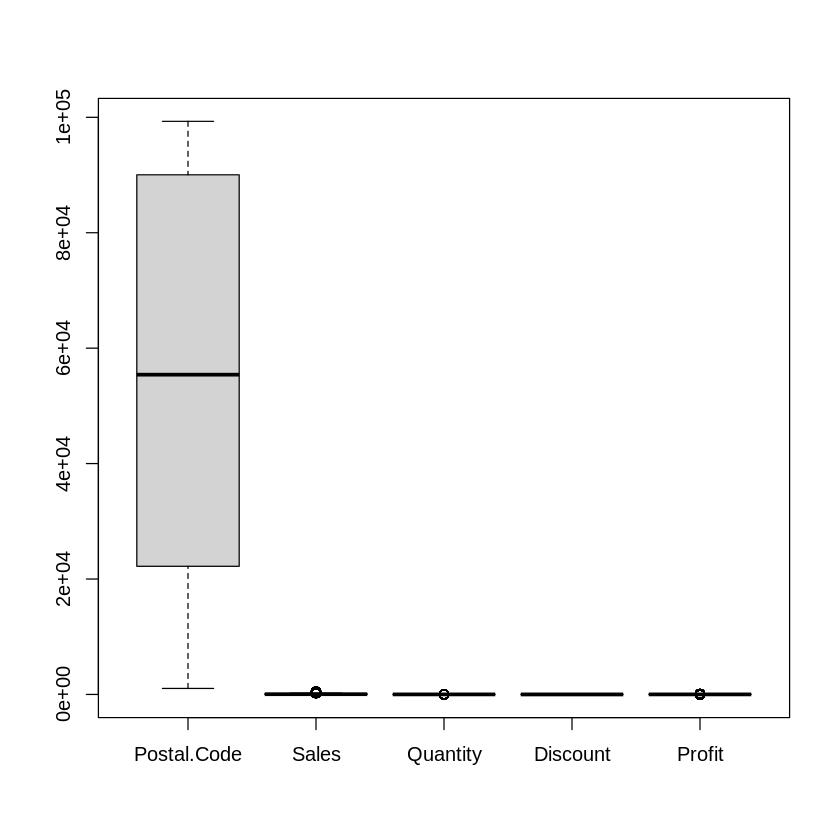

In [ ]:
#Boxplot untuk melihat outliers
num_cols <- unlist(lapply(df_clean, is.numeric)) #Memilih kolom bertipe numerik
df_num <- df_clean[ , num_cols]
boxplot(df_num)

In [ ]:
cat("bentuk data")
cat("\njumlah baris: ", nrow(df_clean))
cat("\njumlah kolom: ", ncol(df_clean))

bentuk data
jumlah baris:  7142
jumlah kolom:  20

In [ ]:
# Menggunakan sapply() untuk mendapatkan nilai unik dalam setiap kolom
nilai_unik_per_kolom <- sapply(df_clean, unique)

# Menampilkan nilai unik dalam setiap kolom
print(nilai_unik_per_kolom)

$Order.ID
   [1] "CA-2016-152156" "CA-2016-138688" "US-2015-108966" "CA-2014-115812"
   [5] "CA-2017-114412" "CA-2014-167164" "CA-2014-143336" "CA-2016-137330"
   [9] "US-2017-156909" "CA-2016-121755" "US-2015-150630" "CA-2017-107727"
  [13] "CA-2015-117415" "CA-2017-120999" "CA-2016-101343" "CA-2017-139619"
  [17] "CA-2016-118255" "CA-2014-146703" "CA-2016-169194" "CA-2015-115742"
  [21] "CA-2016-105816" "CA-2016-111682" "CA-2015-135545" "US-2015-164175"
  [25] "CA-2014-106376" "CA-2016-119823" "CA-2016-106075" "CA-2017-114440"
  [29] "US-2015-134026" "US-2017-118038" "CA-2016-127208" "CA-2014-139451"
  [33] "CA-2015-149734" "CA-2017-140088" "CA-2017-155558" "CA-2016-159695"
  [37] "CA-2016-109806" "CA-2015-149587" "CA-2017-161018" "CA-2017-157833"
  [41] "CA-2016-149223" "CA-2016-158568" "CA-2016-129903" "US-2015-156867"
  [45] "CA-2017-119004" "CA-2015-129476" "CA-2017-146780" "CA-2016-128867"
  [49] "CA-2014-115259" "CA-2016-103730" "US-2017-107272" "US-2016-125969"
  [53] "US-2017

**EDA**

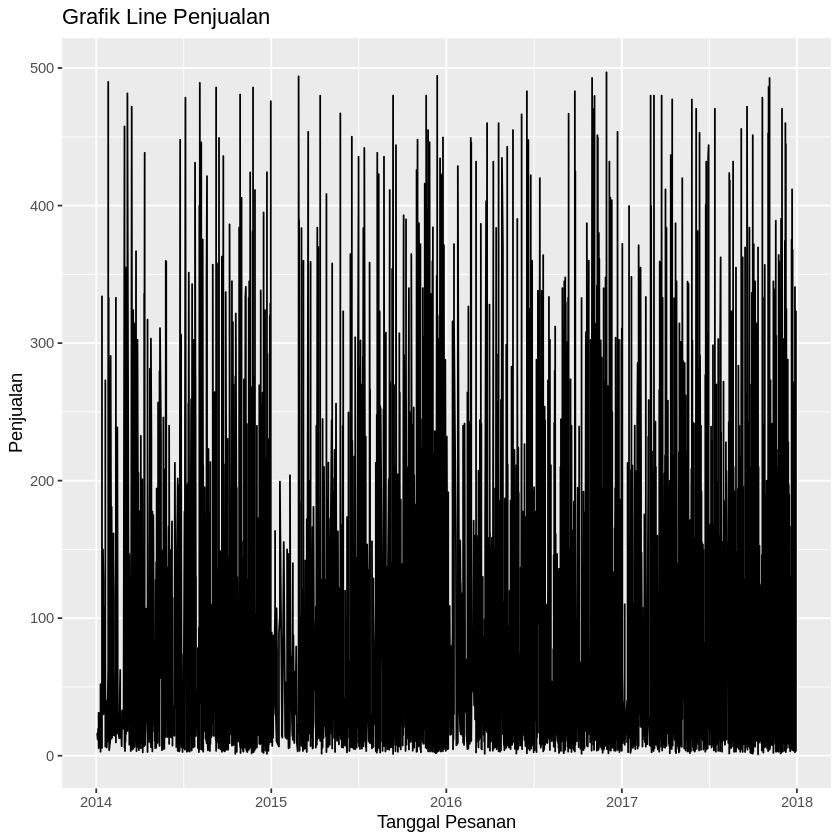

In [ ]:
ggplot(data = df_clean, aes(x = Order.Date, y = Sales)) +
       geom_line() +
       labs(title = "Grafik Line Penjualan",
       x = "Tanggal Pesanan",
       y = "Penjualan")

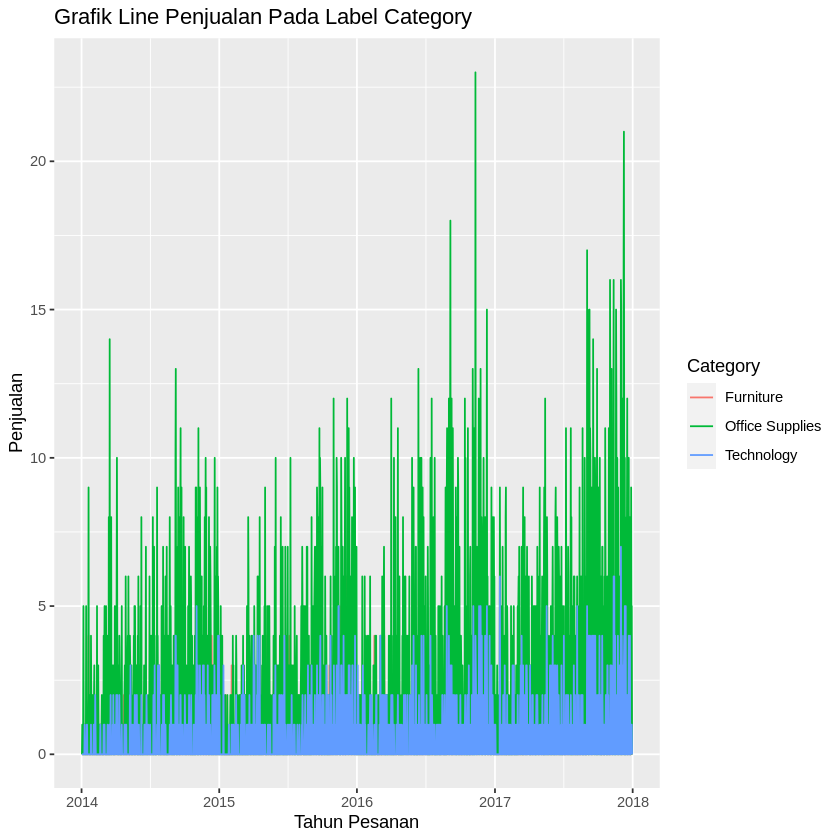

In [ ]:
#Penjualan Untuk Category berdasarkan Tahunan
ggplot(data = df_clean, mapping = aes(x = Order.Date, colour = Category)) +
  geom_freqpoly(binwidth = 0.8)+
       labs(title = "Grafik Line Penjualan Pada Label Category", x = "Tahun Pesanan", y = "Penjualan")

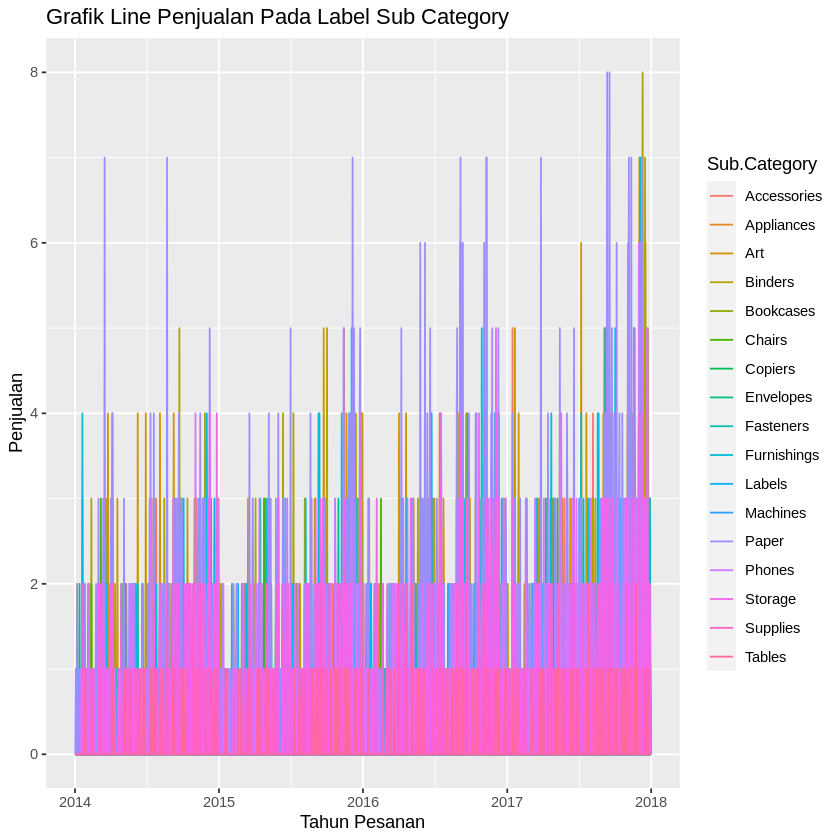

In [ ]:
#Penjualan Untuk Sub Category Berdasarkan Tahunan
ggplot(data = df_clean, mapping = aes(x = Order.Date, colour = Sub.Category)) +
  geom_freqpoly(binwidth = 1.2)+
       labs(title = "Grafik Line Penjualan Pada Label Sub Category", x = "Tahun Pesanan", y = "Penjualan")

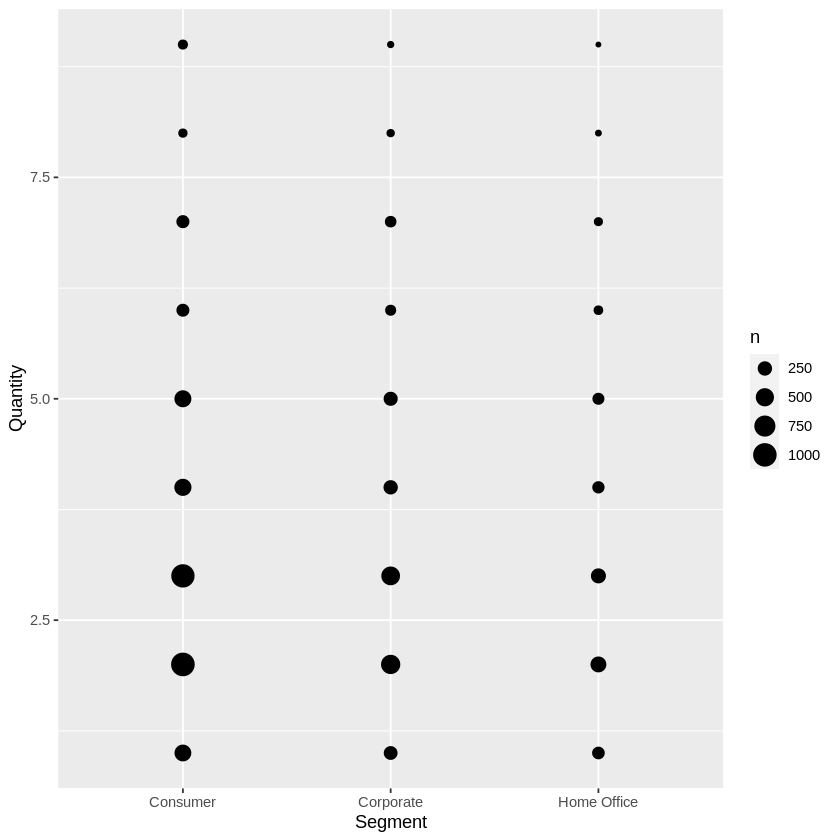

In [ ]:
#Korelasi antara pembeli dan kuantitas barang yang dibelinya
ggplot(df_clean, aes(x = Segment, y = Quantity)) +
  geom_count()

In [ ]:
df_clean |>
  count(Quantity, Segment)

Quantity,Segment,n
<int>,<chr>,<int>
1,Consumer,399
1,Corporate,221
1,Home Office,169
2,Consumer,1015
2,Corporate,586
2,Home Office,338
3,Consumer,979
3,Corporate,543
3,Home Office,286


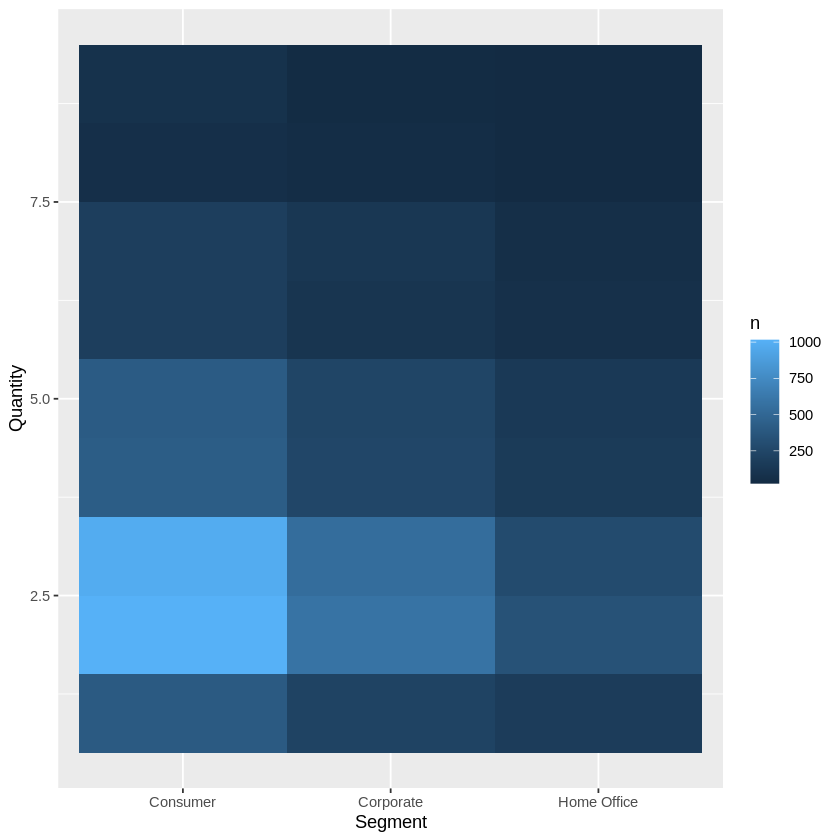

In [ ]:
df_clean |>
  count(Segment, Quantity) |>
  ggplot(aes(x = Segment, y = Quantity)) +
  geom_tile(aes(fill = n))

**Encode**

In [ ]:
#Label Encoding
df_clean$Order.ID <-  as.integer(factor(df_clean$Order.ID))

In [ ]:
df_clean$Order.Date <-  as.integer(factor(df_clean$Order.Date))

In [ ]:
df_clean$Ship.Date <-  as.integer(factor(df_clean$Ship.Date))

In [ ]:
df_clean$Ship.Mode <-  as.integer(factor(df_clean$Ship.Mode))

In [ ]:
df_clean$Customer.ID <- as.integer(factor(df_clean$Customer.ID))

In [ ]:
df_clean$Customer.Name <- as.integer(factor(df_clean$Customer.Name))

In [ ]:
df_clean$Segment <- as.integer(factor(df_clean$Segment))

In [ ]:
df_clean$Country <- as.integer(factor(df_clean$Country))

In [ ]:
df_clean$City <- as.integer(factor(df_clean$City))

In [ ]:
df_clean$State <- as.integer(factor(df_clean$State))

In [ ]:
df_clean$Region <- as.integer(factor(df_clean$Region))

In [ ]:
df_clean$Product.ID <- as.integer(factor(df_clean$Product.ID))

In [ ]:
df_clean$Category <- as.integer(factor(df_clean$Category))

In [ ]:
df_clean$Sub.Category <- as.integer(factor(df_clean$Sub.Category))

In [ ]:
df_clean$Product.Name <- as.integer(factor(df_clean$Product.Name))

Warning message:
“Removed 40 rows containing missing values (`geom_text()`).”


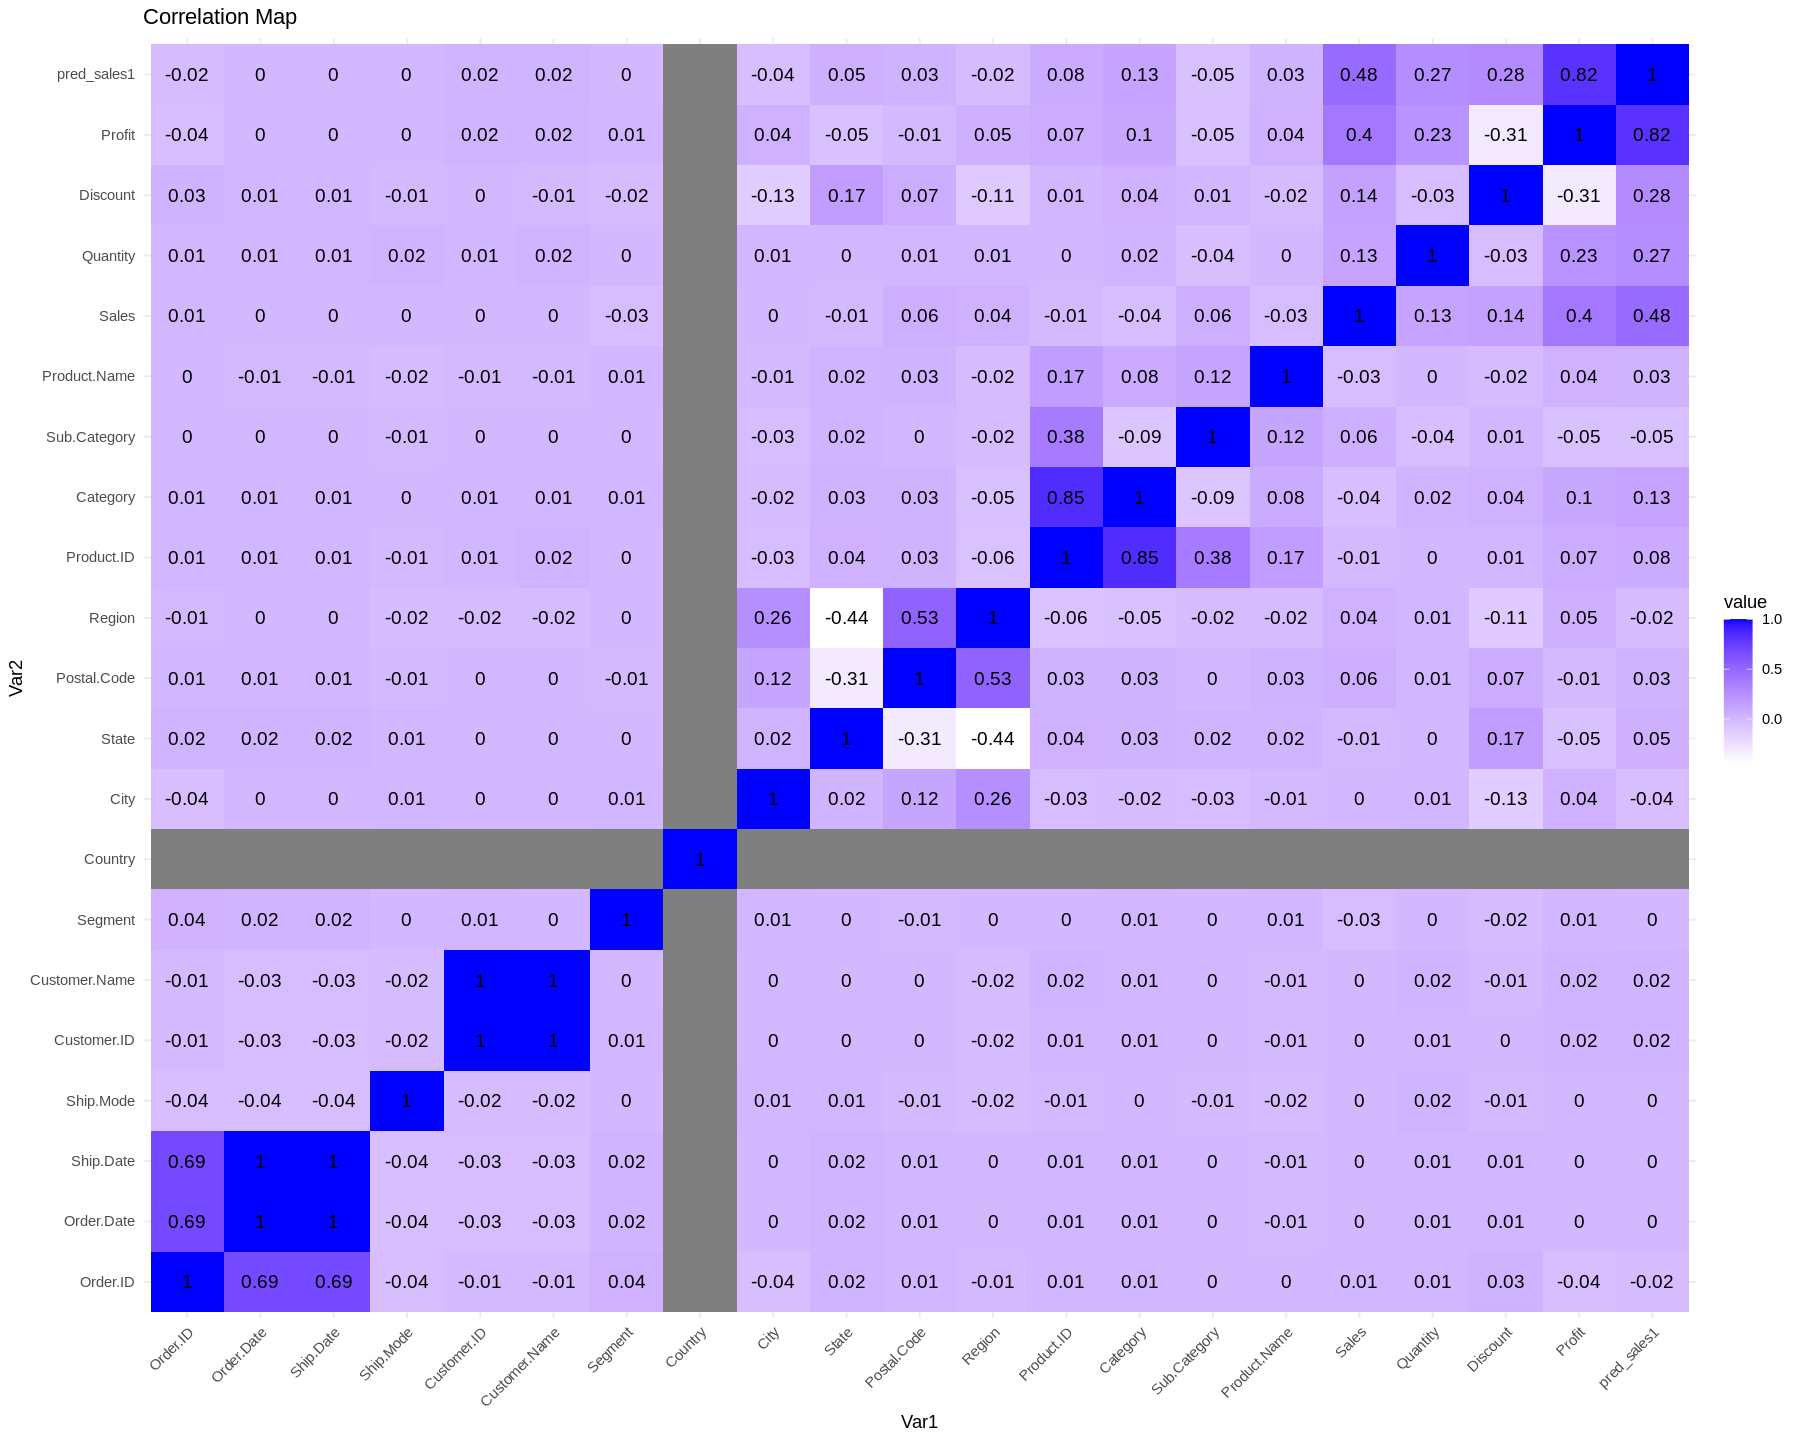

In [ ]:
library(reshape2)
library(ggplot2)

# Mengatur ukuran output plot
options(repr.plot.width = 15, repr.plot.height = 12)  # Mengatur lebar dan tinggi plot

# Membuat correlation matrix
corr_mat <- round(cor(df_clean), 2)  # Mengatur jumlah desimal
melted_corr_mat <- melt(corr_mat)

# Membuat correlation map dengan label angka korelasi
ggplot(data = melted_corr_mat, aes(x = Var1, y = Var2, fill = value)) +
  geom_tile() +
  geom_text(aes(label = value), color = "black", size = 4) +  # Menambahkan label angka
  scale_fill_gradient(low = "white", high = "blue") +  # Mengatur skala warna
  labs(title = "Correlation Map") +  # Menambahkan judul plot
  theme_minimal() +  # Memilih tema plot
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Menyesuaikan label sumbu x


In [ ]:
popularity_corr <- melted_corr_mat[melted_corr_mat$Var1 == 'Sales', ]
sorted_popularity_corr <- popularity_corr[order(popularity_corr$value, decreasing=TRUE),]
sorted_popularity_corr

,Var1,Var2,value
,<fct>,<fct>,<dbl>
337,Sales,Sales,1.000000000
397,Sales,Profit,0.397020239
377,Sales,Discount,0.137018825
357,Sales,Quantity,0.128156761
217,Sales,Postal.Code,0.058390630
297,Sales,Sub.Category,0.057709645
237,Sales,Region,0.036953023
17,Sales,Order.ID,0.006006895
77,Sales,Ship.Mode,0.004046727


In [ ]:
head(df_clean)

,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Country,City,State,Postal.Code,Region,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>
1,2105,836,892,3,144,167,1,1,187,16,42420,3,11,1,5,359,261.960,2,0.0,41.9136
3,1936,707,753,3,240,202,2,1,256,4,90036,4,863,2,11,1269,14.620,2,0.0,6.8714
5,3680,500,543,4,701,684,1,1,147,9,33311,3,1228,2,15,517,22.368,2,0.2,2.5164
6,166,117,123,4,89,114,1,1,256,4,90032,4,164,1,10,513,48.860,7,0.0,14.1694
7,166,117,123,4,89,114,1,1,256,4,90032,4,500,2,3,999,7.280,4,0.0,1.9656
9,166,117,123,4,89,114,1,1,256,4,90032,4,721,2,4,480,18.504,3,0.2,5.7825


In [ ]:
cat("bentuk data")
cat("\njumlah baris: ", nrow(df_clean))
cat("\njumlah kolom: ", ncol(df_clean))

bentuk data
jumlah baris:  7142
jumlah kolom:  20

In [ ]:
cor(df_clean)

Warning message in cor(df_clean):
“the standard deviation is zero”


,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Country,City,State,Postal.Code,Region,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit
Order.ID,1.0000000000,0.6946540106,0.6945664901,-0.0351278466,-0.006364617,-0.008626952,0.0391242084,NA,-0.0378207307,0.0171203154,0.007460075,-0.014249845,0.013012909,0.0112613581,-0.0003298551,-0.004949528,0.006006895,0.007030878,0.033048119,-0.0361833573
Order.Date,0.6946540106,1.0000000000,0.9999639829,-0.0403140388,-0.032054542,-0.034201596,0.0168062199,NA,-0.0001043355,0.0164351161,0.013146372,-0.003528322,0.008296192,0.0083551085,-0.0017773214,-0.008670918,-0.002061849,0.012517438,0.005236790,-0.0011977929
Ship.Date,0.6945664901,0.9999639829,1.0000000000,-0.0371716898,-0.031976397,-0.034130543,0.0167829402,NA,-0.0001398273,0.0163164489,0.012979229,-0.003418483,0.008186992,0.0083641873,-0.0019839354,-0.008872564,-0.001942424,0.012628693,0.005018095,-0.0008894564
Ship.Mode,-0.0351278466,-0.0403140388,-0.0371716898,1.0000000000,-0.016850470,-0.016840174,0.0028968571,NA,0.0115671474,0.0129778256,-0.007612736,-0.018740446,-0.010573807,0.0002397435,-0.0130956940,-0.015981760,0.004046727,0.019779368,-0.007159083,0.0018283436
Customer.ID,-0.0063646165,-0.0320545424,-0.0319763967,-0.0168504699,1.000000000,0.995795176,0.0070308138,NA,0.0028223063,0.0043212233,0.003400723,-0.018635546,0.013053537,0.0113420146,-0.0017020476,-0.007549048,-0.003955311,0.014709602,-0.004158536,0.0172923689
Customer.Name,-0.0086269519,-0.0342015957,-0.0341305428,-0.0168401740,0.995795176,1.000000000,0.0012352274,NA,0.0018531178,0.0036491557,0.001980809,-0.020862060,0.015407498,0.0132479186,-0.0013661086,-0.005406259,-0.004120115,0.015408455,-0.006080023,0.0185668005
Segment,0.0391242084,0.0168062199,0.0167829402,0.0028968571,0.007030814,0.001235227,1.0000000000,NA,0.0097023665,0.0007271457,-0.010047747,-0.003574081,0.003641702,0.0063194267,0.0035014878,0.006690253,-0.025811868,-0.001171420,-0.018187967,0.0111112288
Country,NA,NA,NA,NA,NA,NA,NA,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
City,-0.0378207307,-0.0001043355,-0.0001398273,0.0115671474,0.002822306,0.001853118,0.0097023665,NA,1.0000000000,0.0152665590,0.117957323,0.262227851,-0.027673144,-0.0185532601,-0.0254655105,-0.014413624,-0.001453790,0.006084087,-0.134416846,0.0380823758
State,0.0171203154,0.0164351161,0.0163164489,0.0129778256,0.004321223,0.003649156,0.0007271457,NA,0.0152665590,1.0000000000,-0.309233447,-0.442305227,0.040957955,0.0294568721,0.0160974949,0.019108824,-0.012052634,-0.001478346,0.166692387,-0.0533227085


**Model Building**

In [ ]:
#scaling data
df_clean <- scale(df_clean)

In [ ]:
df_clean <- as.data.frame(df_clean)

In [ ]:
# create train and test
#make this example reproducible
set.seed(1)

#use 70% of dataset as training set and 30% as test set
sample <- sample(c(TRUE, FALSE), nrow(df_clean), replace=TRUE, prob=c(0.7,0.3))
train  <- df_clean[sample, ]
test   <- df_clean[!sample, ]

In [ ]:
y_train <- train[["Sales"]]
y_test <- test[["Sales"]]

x_train <- train[c("Category", "City", "Country", "Customer.ID", "Customer.Name", "Discount", "Order.Date", "Order.ID", "Postal.Code", "Product.ID", "Product.Name", "Profit", "Quantity", "Region", "Segment", "Ship.Date", "Ship.Mode", "State", "Sub.Category")]
x_test <- test[c("Category", "City", "Country", "Customer.ID", "Customer.Name", "Discount", "Order.Date", "Order.ID", "Postal.Code", "Product.ID", "Product.Name", "Profit", "Quantity", "Region", "Segment", "Ship.Date", "Ship.Mode", "State", "Sub.Category")]

# Validasi hasil split
cat("\nJumlah baris x train:", nrow(x_train))
cat("\nJumlah baris x test:", nrow(x_test))

cat("\nJumlah kolom x: ", ncol(x_train))
cat("\nJumlah kolom y: ", ncol(y_train))


Jumlah baris x train: 4950
Jumlah baris x test: 2192
Jumlah kolom x:  19
Jumlah kolom y: 

In [ ]:
dependent_variable <- "Sales"
independent_variables <- c("Quantity", "Discount", "Profit")  # Variabel independen

# Membuat model regresi linear
model <- lm(paste(dependent_variable, "~", paste(independent_variables, collapse = " + ")), data = df_clean)

# Menampilkan summary model
summary(model)


Call:
lm(formula = paste(dependent_variable, "~", paste(independent_variables, 
    collapse = " + ")), data = df_clean)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.1923 -0.5546 -0.2136  0.0386  5.0917 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.277e-17  1.036e-02   0.000   1.0000    
Quantity     2.566e-02  1.066e-02   2.407   0.0161 *  
Discount     2.868e-01  1.092e-02  26.271   <2e-16 ***
Profit       4.801e-01  1.121e-02  42.825   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8759 on 7138 degrees of freedom
Multiple R-squared:  0.2332,	Adjusted R-squared:  0.2329 
F-statistic: 723.6 on 3 and 7138 DF,  p-value: < 2.2e-16


**Evaluasi Model**

In [ ]:
install.packages('Metrics')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# prediksi model 1
 library(Metrics)

 df_clean$pred_sales1 <- predict(model)

 # display evaluations
 cat('\nMAE: ', mae(df_clean$Sales, df_clean$pred_sales1))
 cat('\nMSE: ', mse(df_clean$Sales, df_clean$pred_sales1))
 cat('\nRMSE: ',rmse(df_clean$Sales, df_clean$pred_sales1))


MAE:  0.5753891
MSE:  0.7666909
RMSE:  0.8756088

In [ ]:
# #bandingkan dengan model 2
# #build model 2
#model2 <- lm(Sales ~ , data = x_train)

#test$pred_sales2 <- predict(model2, newdata=x_test)

# # display evaluations
 #cat('\nMAE: ', mae(df_clean$Sales, df_clean$pred_sales2))
 #cat('\nMSE: ', mse(df_clean$Sales, df_clean$pred_sales2))
 #cat('\nRMSE: ',rmse(df_clean$Sales, df_clean$pred_sales2))

ERROR: ignored

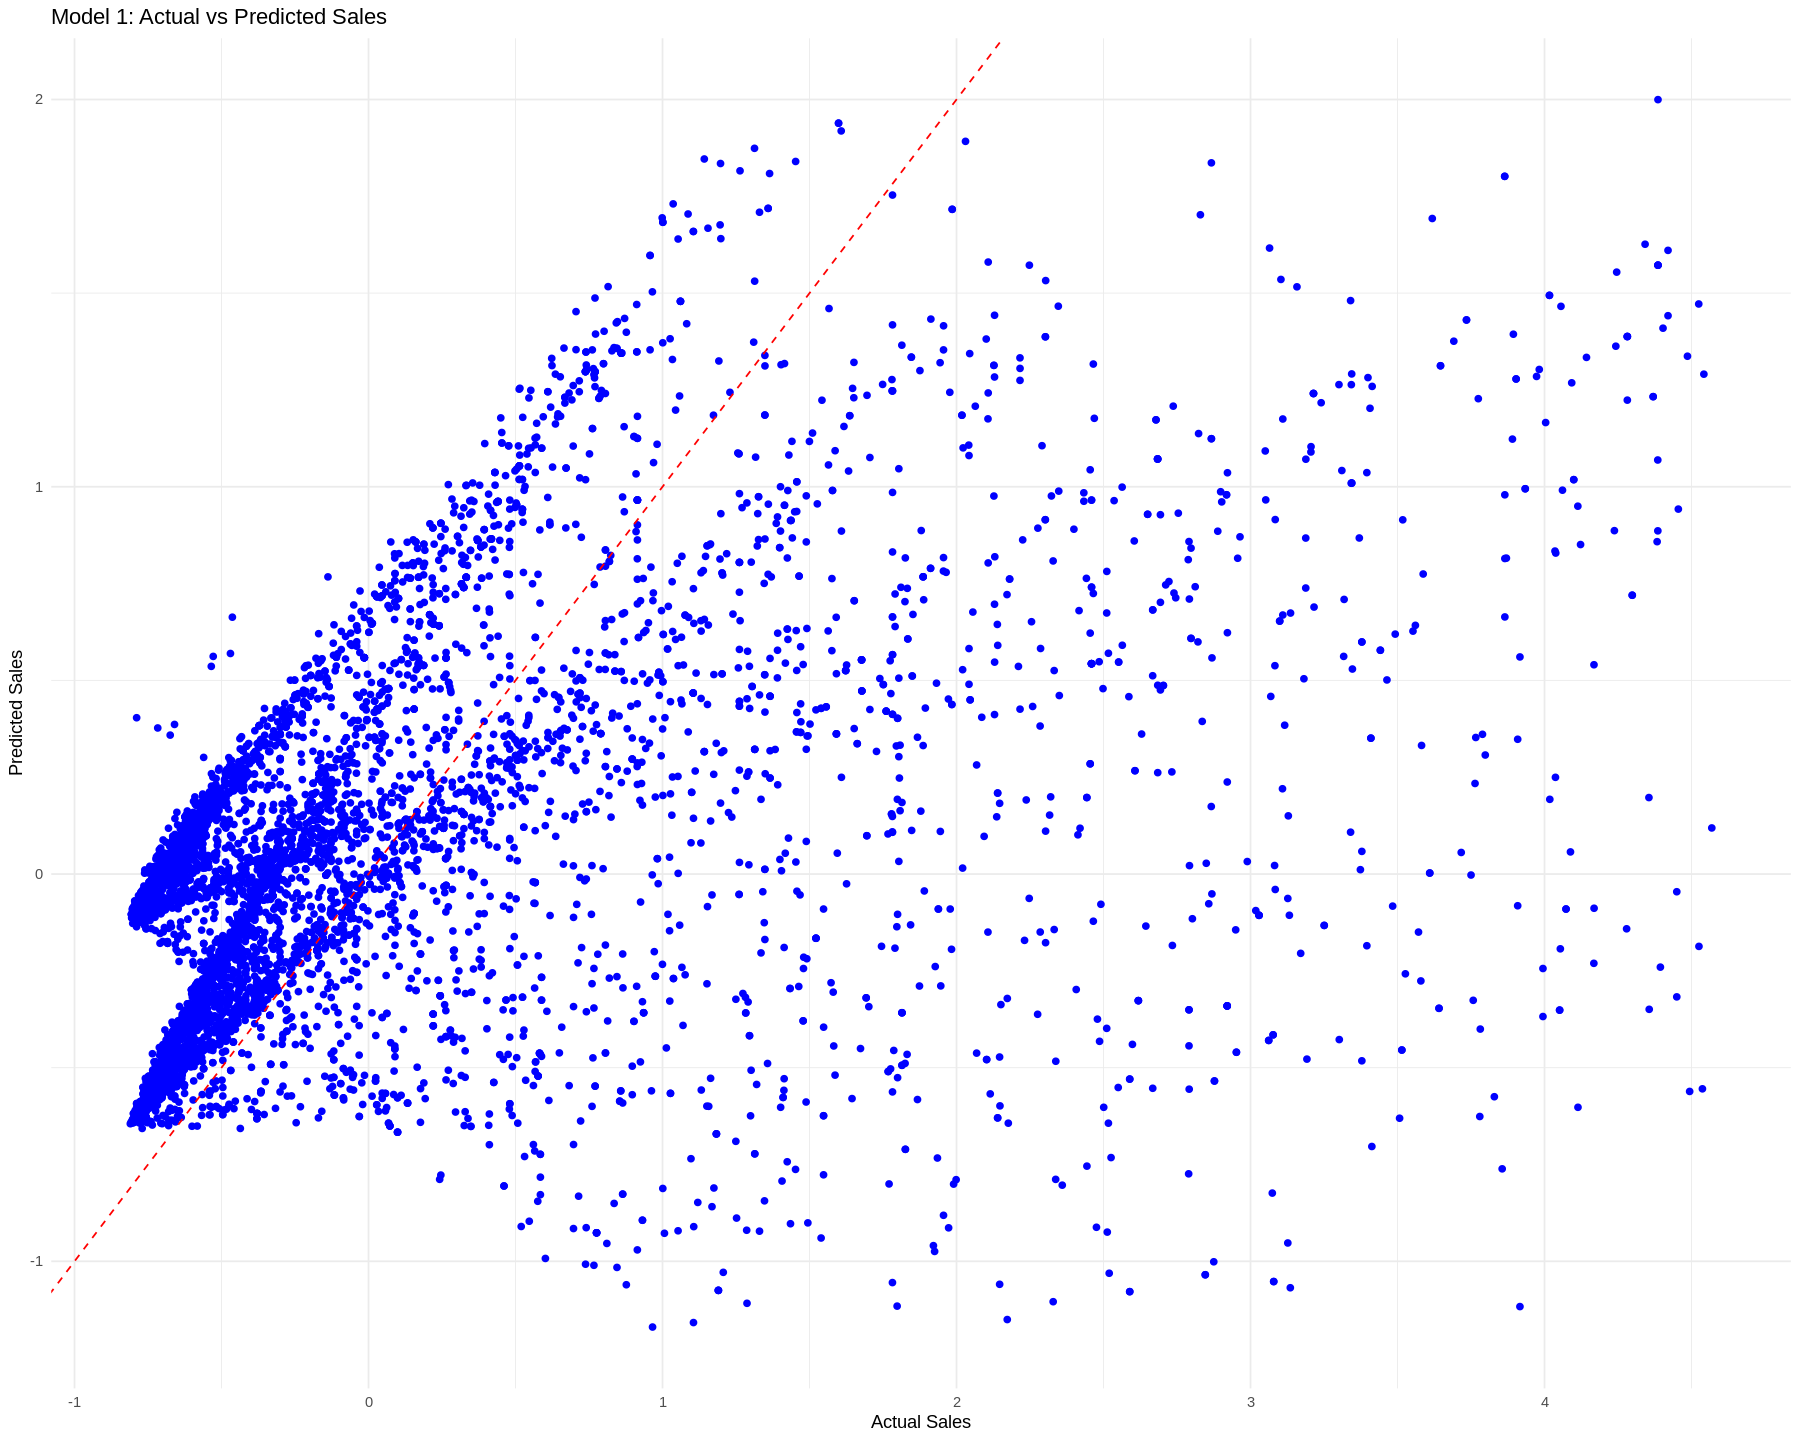

In [ ]:
# Scatterplot untuk membandingkan nilai aktual dan prediksi
ggplot(df_clean, aes(x = Sales, y = pred_sales1)) +
  geom_point(color = "blue") +
  geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "red") +
  labs(x = "Actual Sales", y = "Predicted Sales", title = "Model 1: Actual vs Predicted Sales") +
  theme_minimal()